You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
    
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?
usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:
    
Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Answer 1:

In [16]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#read the data file
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

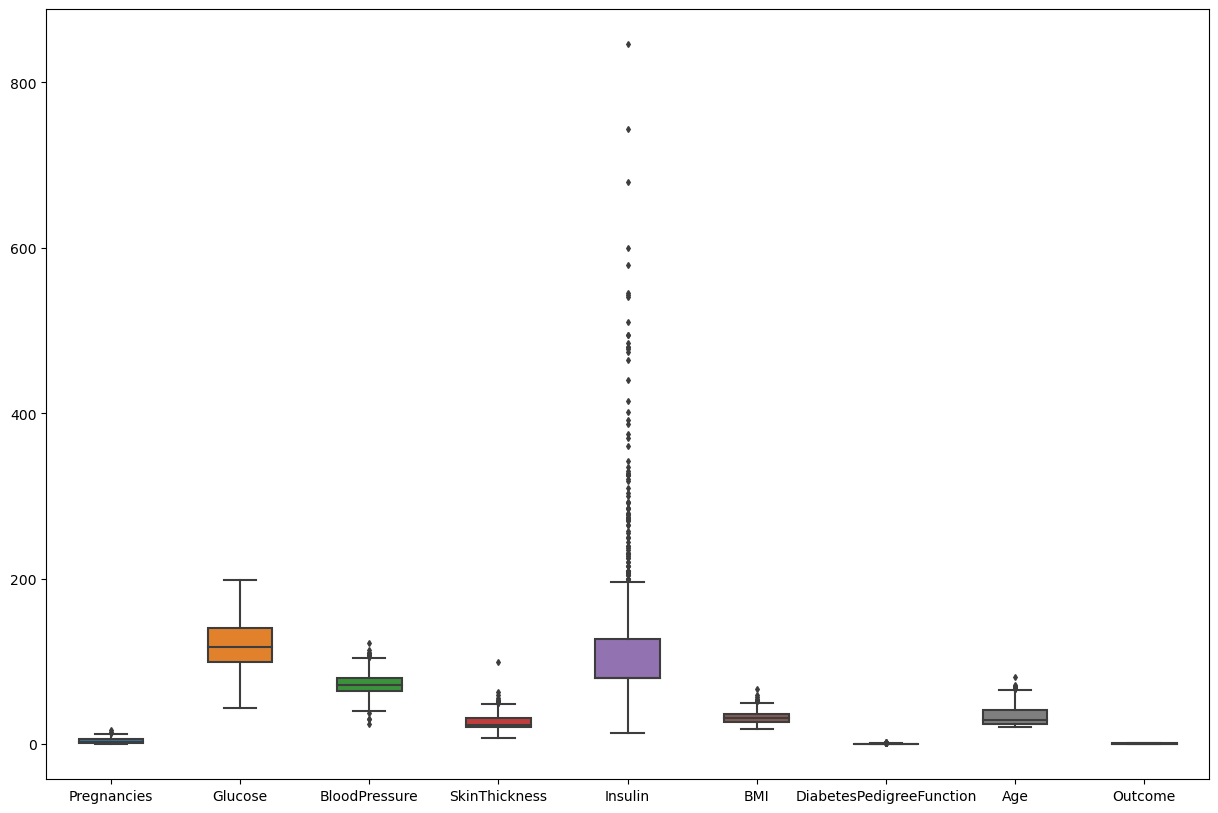

In [21]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [22]:
data.corr()
# Features are not much related

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Answer 2:

In [23]:
# checking missing values
data.isnull().sum()
# There are no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Features Before Scaling')

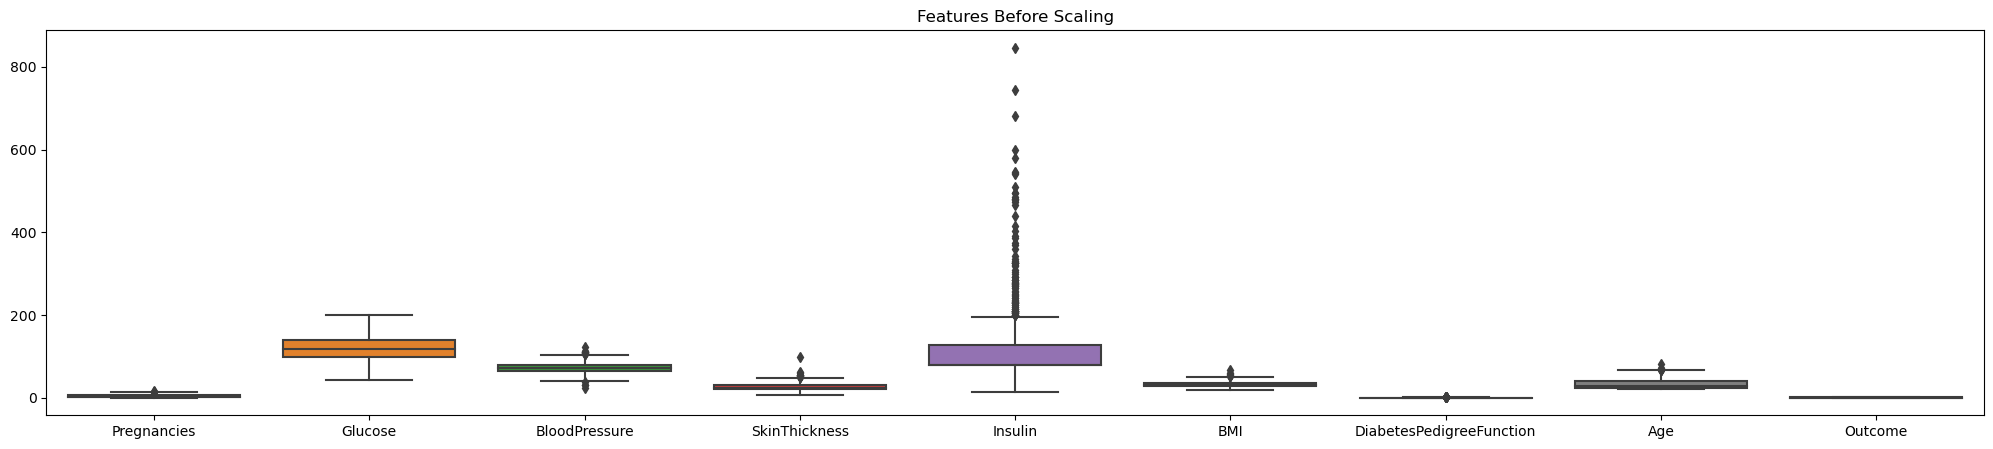

In [24]:
# Look for outliers
plt.subplots(figsize=(25, 5))
sns.boxplot(data)
plt.title('Features Before Scaling')
# We will remove outliers

In [25]:
# calculate the interquartile range (IQR) for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# identify and remove outliers from the dataset
data_outlier_removed = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# print the number of rows removed
print("Number of rows removed:", len(data) - len(data_outlier_removed))

Number of rows removed: 149


There is no categorical features in this dataset.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Answer 3:

In [30]:
# set the random seed to ensure reproducibility
random_seed = 42

#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_seed)

# print the size of the training and test sets
print("Number of samples in X_train set: ", len(X_train))
print("Number of samples in X_test set: ", len(X_test))
print("Number of samples in y_train set: ", len(y_train))
print("Number of samples in y_test set: ", len(y_test))

Number of samples in X_train set:  614
Number of samples in X_test set:  154
Number of samples in y_train set:  614
Number of samples in y_test set:  154


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Answer 4:

In [32]:
## Decision Tree Model Training With Hyperparameter Tuning

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

# print the best hyperparameters and accuracy score
print("Best hyperparameters: ", clf.best_params_)
print("Best accuracy score: ", clf.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.668 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.654 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.634 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.659 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.652 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.654 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.654 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

In [35]:
classifier=DecisionTreeClassifier(criterion='log_loss',max_depth= 5, max_features= 'log2', splitter= 'random')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       splitter='random')

In [36]:
## Decision Tree prediction
y_pred = classifier.predict(X_test)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Answer 5:

In [37]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[90,  9],
       [27, 28]])

In [38]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[90,  9],
       [27, 28]])

In [39]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [40]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)

In [41]:
Precision = true_positive/(true_positive+false_positive)

In [42]:
Recall = true_positive/(true_positive+false_negative)

In [ ]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)

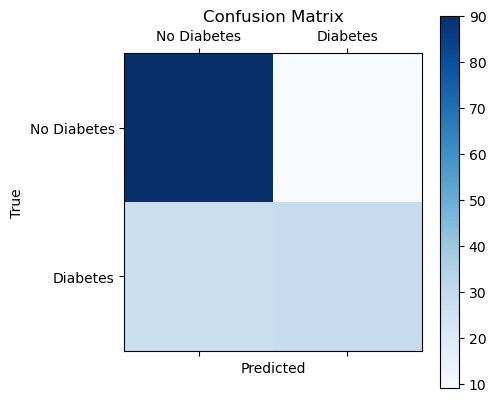

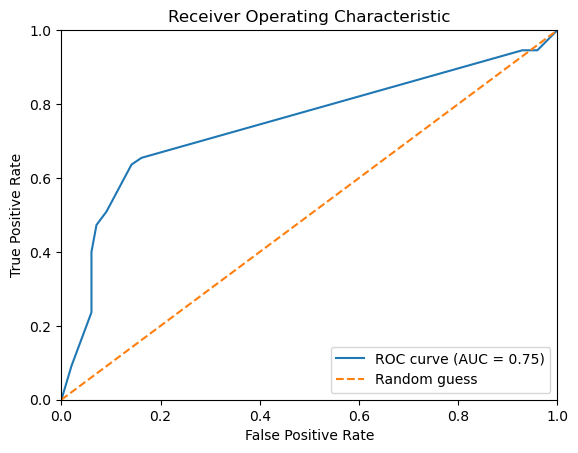

Accuracy: 0.77
Precision: 0.91
Recall: 0.77
F1 Score: 0.83
Confusion Matrix:
 [[90  9]
 [27 28]]
ROC AUC Score: 0.75


In [52]:
# plot the confusion matrix
plt.matshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.yticks([0,1], ['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the positive class (diabetes)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the area under the ROC curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# print the evaluation metrics
print("Accuracy: {:.2f}".format(Accuracy))
print("Precision: {:.2f}".format(Precision))
print("Recall: {:.2f}".format(Recall))
print("F1 Score: {:.2f}".format(F1_Score))
print("Confusion Matrix:\n", conf_mat)
print("ROC AUC Score: {:.2f}".format(auc_score))

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Answer 6:

We can interpret the decision tree as follows:

The root node of the tree is the variable Glucose.

If Glucose is less than or equal to 127.50, then the tree splits based on the variable BMI.

If BMI is less than or equal to 28.95, then the tree splits based on the variable Age.

If Age is less than or equal to 28.50 and BloodPressure is less than or equal to 57.00, then the predicted class is 1 (Diabetes).

If Age is less than or equal to 28.50 and BloodPressure is greater than 57.00, then the predicted class is 0 (No Diabetes).

If Age is greater than 28.50 and DiabetesPedigreeFunction is less than or equal to 0.39, then the predicted class is 0 (No Diabetes).

If Age is greater than 28.50 and DiabetesPedigreeFunction is greater than 0.39, then the predicted class is 1 (Diabetes).

If BMI is greater than 28.95 and Glucose is less than or equal to 107

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

Answer 7:

In [60]:
## Validating the Decision Tree Model
y_pred=classifier.predict([[1,85,66,29,0,26.6,0.351,31]])
y_pred

array([0])

Validating a decision tree model is an important step in the machine learning workflow, as it helps to ensure that the model is accurate and robust to changes in the dataset or environment. There are several methods for validating a decision tree model, including applying it to new data and testing its robustness to changes in the dataset or environment using sensitivity analysis and scenario testing.

Sensitivity analysis can help us understand how sensitive the model is to changes in the input data. For example, we can test the model's sensitivity to changes in the threshold values for the different features in the diabetes dataset. We can also test the model's sensitivity to changes in the weights assigned to different features. By varying these values, we can see how the model's performance changes and identify any potential weaknesses or areas of improvement.

Scenario testing can help us understand how the model performs under different scenarios or assumptions. For example, we can test the model's performance under different assumptions about the prevalence of diabetes in the population, or the effectiveness of different treatments for diabetes. By testing the model under different scenarios, we can identify any limitations or potential biases in the model and make adjustments as necessary.